In [1]:
import sys
import numpy as np
import matplotlib.patches as patches

In [2]:
%run constants.py

In [3]:
%run "/Users/audreyburggraf/Desktop/QUEEN'S/THESIS RESEARCH/PLOTTING C29 989/FUNCTIONS/load_functions"

In [4]:
%run "/Users/audreyburggraf/Desktop/QUEEN'S/THESIS RESEARCH/PLOTTING C29 989/FITS FILES/BAND6/load_band6_data.py"

In [5]:
%run "/Users/audreyburggraf/Desktop/QUEEN'S/THESIS RESEARCH/PLOTTING C29 989/CARTA FILES/BAND6/load_carta_data_band6.py"

In [6]:
calculated_polarization_angle_rad = calculate_polarization_angle(StokesQ_data_2d_Jy, StokesU_data_2d_Jy)
calc_polarized_frac = calculate_polarized_fraction(StokesQ_data_2d_mJy, StokesU_data_2d_mJy, StokesI_data_2d_mJy)
calculated_polarized_intensity = calculate_polarized_intensity(StokesQ_data_2d_mJy, StokesU_data_2d_mJy)

## Stokes I cbar ticks

In [7]:
StokesI_stretched, StokesI_unstretched_cbar_ticks = normalize_stokesI_for_cmap(StokesI_data_2d_mJy,
                                                                              custom_min = StokesI_custom_vmin_band6,
                                                                              custom_max = StokesI_custom_vmax_band6)

## Beam info

In [8]:
# Beam Info

beam_info = get_beam_info(StokesI_header)

BMAJ_deg, BMIN_deg, BMAJ_pix, BMIN_pix, BPA_astronomy_deg, BPA_deg_cartesian = beam_info

print(f'The angle in astronomy angles is {BPA_astronomy_deg:.3f} degrees')
print(f'The angle in cartesian angles is {BPA_deg_cartesian:.3f} degrees')

The angle in astronomy angles is -68.553 degrees
The angle in cartesian angles is 21.447 degrees


## Constants from Band 6

In [9]:
RA_min_pix, Dec_min_pix = string_to_pixel(min_str_band6, StokesI_wcs)
RA_max_pix, Dec_max_pix = string_to_pixel(max_str_band6, StokesI_wcs)


xmin = RA_max_pix
xmax = RA_min_pix

ymin = Dec_min_pix
ymax = Dec_max_pix

In [10]:
reference_length_pix = length_in_pixels(reference_length_AU, distance_pc, StokesI_header)

print(reference_length_pix)

42.08750255304284


## Make Stokes I Plot

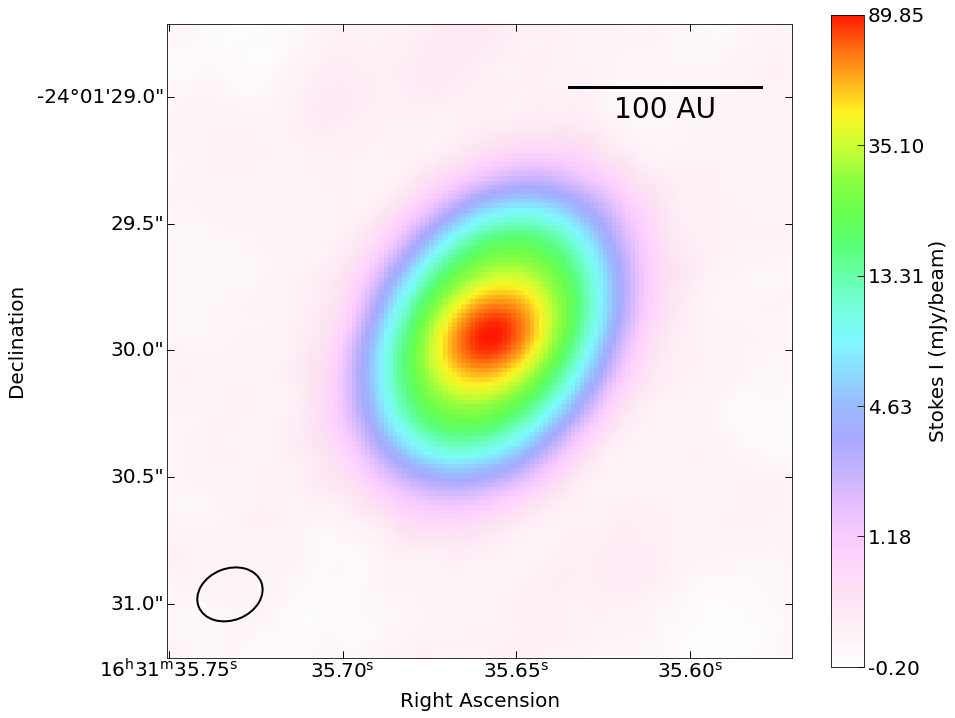

In [11]:
fig, ax = create_stokes_i_base_plot(StokesI_wcs, StokesI_stretched, soft_colormap_v2, 
                                    normalized_cbar_ticks, StokesI_unstretched_cbar_ticks, 
                                    xmin, xmax, ymin, ymax, reference_length_pix, reference_length_AU,
                                    BMAJ_pix, BMIN_pix, BPA_deg_cartesian, 
                                    max_length_pix, reference_fraction)

## Make Polarization Intensity Plot

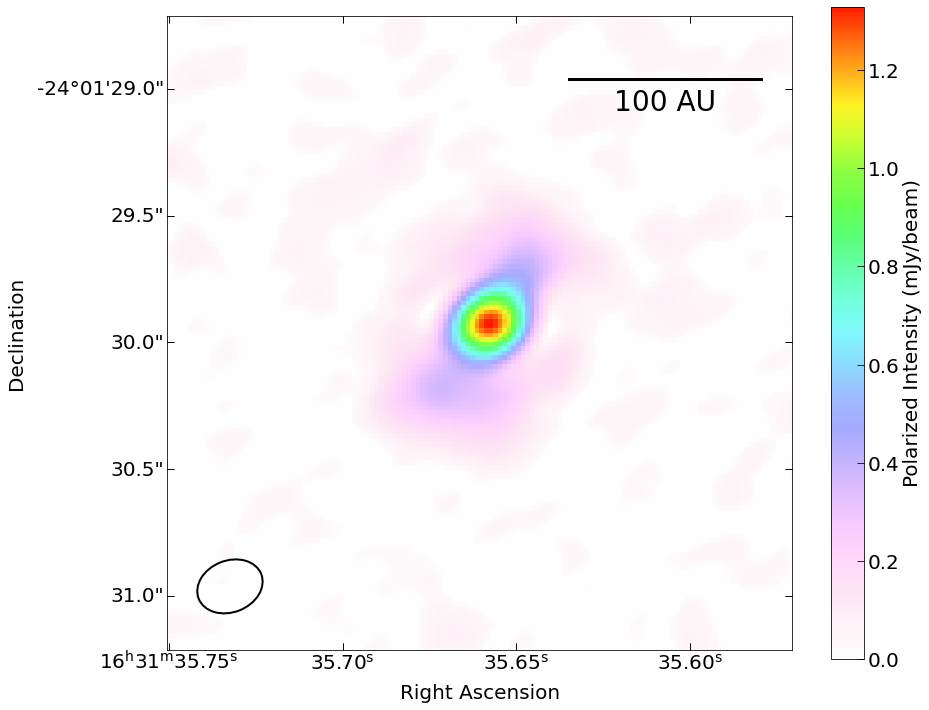

In [12]:
fig, ax = create_base_plot(StokesI_wcs, 
                           PolarizedIntensity_data_2d_mJy, 'Polarized Intensity (mJy/beam)',
                           soft_colormap_v2, 
                           xmin, xmax, ymin, ymax, reference_length_pix, reference_length_AU,
                           BMAJ_pix, BMIN_pix, BPA_deg_cartesian, 
                           max_length_pix, reference_fraction)

## Calculate Vectors

In [13]:
nx, ny = StokesI_data_2d_mJy.shape

In [14]:
# Actual vectors with the same length
# --------------------------------------------------------------------------------------------------      
# List to store vector data
vector_data_actual_same_length_cartesian = []
vector_angle_actual_same_length_astronomy = []

# Loop over values in x and y
for x in range(0, nx, step):
    for y in range(0, ny, step):
        # Check if the conditions are met
        if (StokesI_data_2d_mJy[y, x] / StokesIerr_data_2d_mJy[y, x] > 3 and 
            calculated_polarized_intensity[y, x] / PolarizedIntensity_err_data_2d_mJy[y, x] > 3 and 
            PolarizationAngle_err_data_2d_deg[y, x] < 10): 
            
            # Get the polarization angle at this pixel
            
            angle_rad_cartesian = PolarizationAngle_data_2d_rad[y, x] + np.pi / 2
            
            # Compute the vector components
            dx = vector_length_pix_const * np.cos(angle_rad_cartesian)
            dy = vector_length_pix_const * np.sin(angle_rad_cartesian)
            
            # Store vector data in a row
            vector_data_actual_same_length_cartesian.append([x - dx / 2, x + dx / 2, y - dy / 2, y + dy / 2])
            vector_angle_actual_same_length_astronomy.append(calculated_polarization_angle_rad[y, x])
# --------------------------------------------------------------------------------------------------          

In [15]:
# # Actual vectors with the same length
# # --------------------------------------------------------------------------------------------------      
# # List to store vector data
# vector_data_actual_same_length_cartesian = []
# vector_angle_actual_same_length_astronomy = []

# # Loop over values in x and y
# for x in range(0, nx, step):
#     for y in range(0, ny, step):
#         # Check if the conditions are met
#         if (StokesI_data_2d_mJy[y, x] / StokesIerr_data_2d_mJy[y, x] > 3 and 
#             calculated_polarized_intensity[y, x] / PolarizedIntensity_err_data_2d_mJy[y, x] > 3 and 
#             PolarizationAngle_err_data_2d_deg[y, x] < 10): 
            
#             # Get the polarization angle at this pixel
            
#             angle_rad_cartesian = calculated_polarization_angle_rad[y, x] + np.pi / 2
            
#             # Compute the vector components
#             dx = vector_length_pix_const * np.cos(angle_rad_cartesian)
#             dy = vector_length_pix_const * np.sin(angle_rad_cartesian)
            
#             # Store vector data in a row
#             vector_data_actual_same_length_cartesian.append([x - dx / 2, x + dx / 2, y - dy / 2, y + dy / 2])
#             vector_angle_actual_same_length_astronomy.append(calculated_polarization_angle_rad[y, x])
# # --------------------------------------------------------------------------------------------------   

In [16]:
vector_angle_actual_same_length_astronomy[0]

1.3369638

## Add vectors to both plots

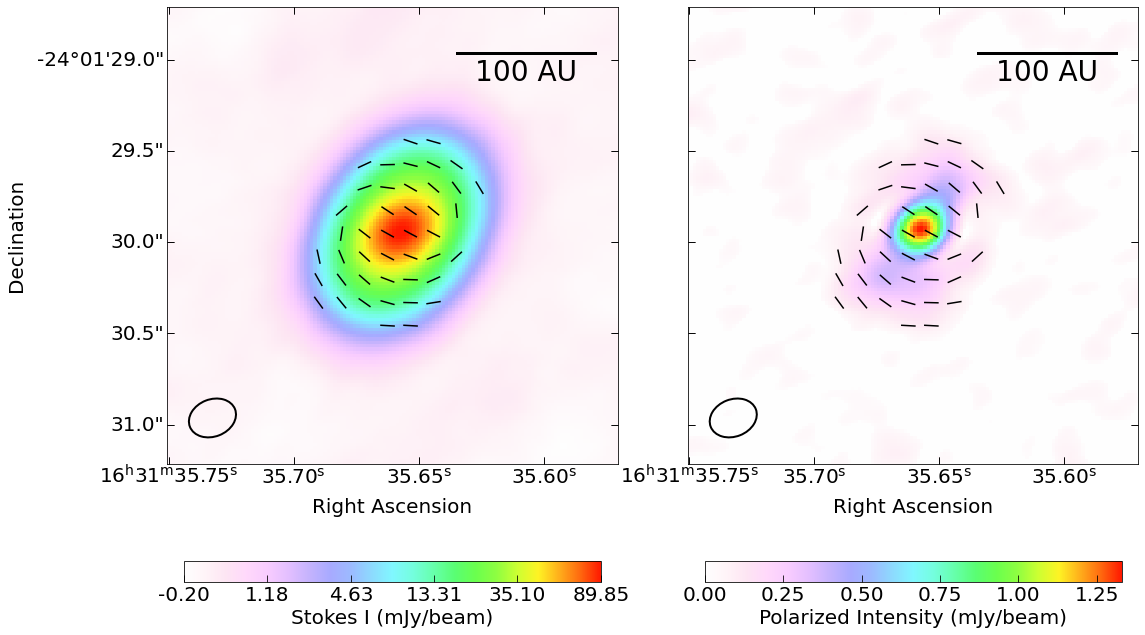

In [17]:
fig, ax = create_stokes_i_plus_one_base_plot(StokesI_wcs, StokesI_stretched, 
                                             normalized_cbar_ticks, StokesI_unstretched_cbar_ticks, 
                                             PolarizedIntensity_data_2d_mJy, 'Polarized Intensity (mJy/beam)',
                                             soft_colormap_v2, 
                                             xmin, xmax, ymin, ymax, reference_length_pix, reference_length_AU,
                                             BMAJ_pix, BMIN_pix, BPA_deg_cartesian, 
                                             max_length_pix, reference_fraction)

for row in vector_data_actual_same_length_cartesian:
    ax[0].plot([row[0], row[1]], [row[2], row[3]], color='black')
    
    
for row in vector_data_actual_same_length_cartesian:
    ax[1].plot([row[0], row[1]], [row[2], row[3]], color='black')

# Slices

In [18]:
major_data_StokesI, major_offset_arcsec_StokesI, minor_data_StokesI, minor_offset_arcsec_StokesI = run_slices(StokesI_data_2d_mJy, 
                                                                                                              StokesI_header,
                                                                                                              StokesI_wcs,
                                                                                                              len(carta_major_data_mJy_StokesI),
                                                                                                              xmin, xmax, ymin, ymax,
                                                                                                              6)

In [19]:
major_data_POLI, major_offset_arcsec_POLI, minor_data_POLI, minor_offset_arcsec_POLI = run_slices(PolarizedIntensity_data_2d_mJy, 
                                                                                                  StokesI_header,
                                                                                                  StokesI_wcs, 
                                                                                                  len(carta_major_data_mJy_POLI),
                                                                                                  xmin, xmax, ymin, ymax, 
                                                                                                  6)

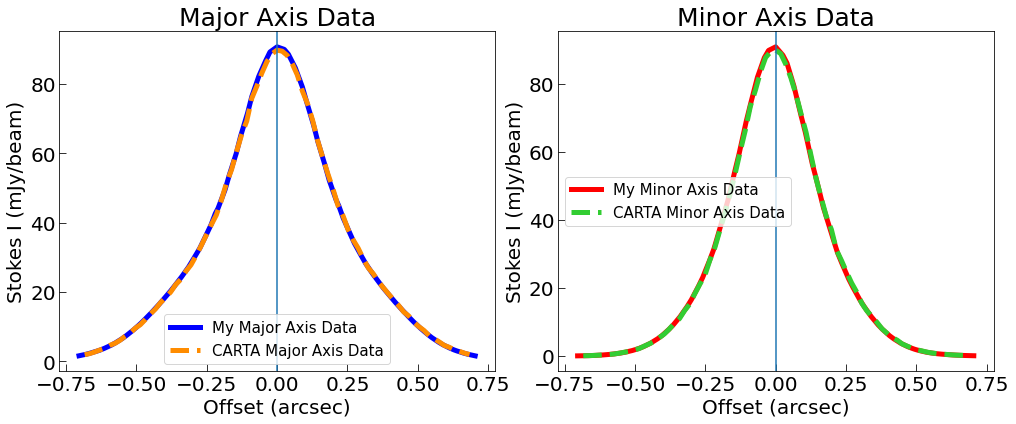

In [20]:
ax = plot_slices_along_axes(
    major_data_StokesI,
    minor_data_StokesI,
    carta_major_data_mJy_StokesI,
    carta_minor_data_mJy_StokesI,
    major_offset_arcsec_StokesI,
    minor_offset_arcsec_StokesI,
    carta_major_offset_StokesI,
    carta_minor_offset_StokesI,
    y_label="Stokes I (mJy/beam)",
    type_of_plot="Line"  # or "Scatter"
)

ax[0].axvline(0)
ax[1].axvline(0)

# Trying Ratios

In [21]:
RA_centre_pix, Dec_centre_pix = string_to_pixel(centre_str_band6, StokesI_wcs)

In [22]:
PA_grid_100Uniform = make_PA_grid_100Uniform(ny, nx, minor_angle_rad_sky_band6)
PA_grid_100Azimuthal = make_PA_grid_100Azimuthal(ny, nx, RA_centre_pix, Dec_centre_pix)

In [23]:
StokesQ_grid_100Uniform,   StokesU_grid_100Uniform   = recover_StokesQU(PA_grid_100Uniform,   StokesI_data_2d_mJy, ny, nx)
StokesQ_grid_100Azimuthal, StokesU_grid_100Azimuthal = recover_StokesQU(PA_grid_100Azimuthal, StokesI_data_2d_mJy, ny, nx)


In [24]:
vector_data_list, testing_vector_angles = ratio_model_band6(StokesQ_grid_100Uniform, StokesU_grid_100Uniform,
                                                            StokesQ_grid_100Azimuthal, StokesU_grid_100Azimuthal,
                                                            ny, nx,
                                                            step, vector_length_pix_const, 
                                                            StokesI_data_2d_mJy, StokesIerr_data_2d_mJy,
                                                            calculated_polarized_intensity, PolarizedIntensity_err_data_2d_mJy,
                                                            PolarizationAngle_err_data_2d_deg)

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


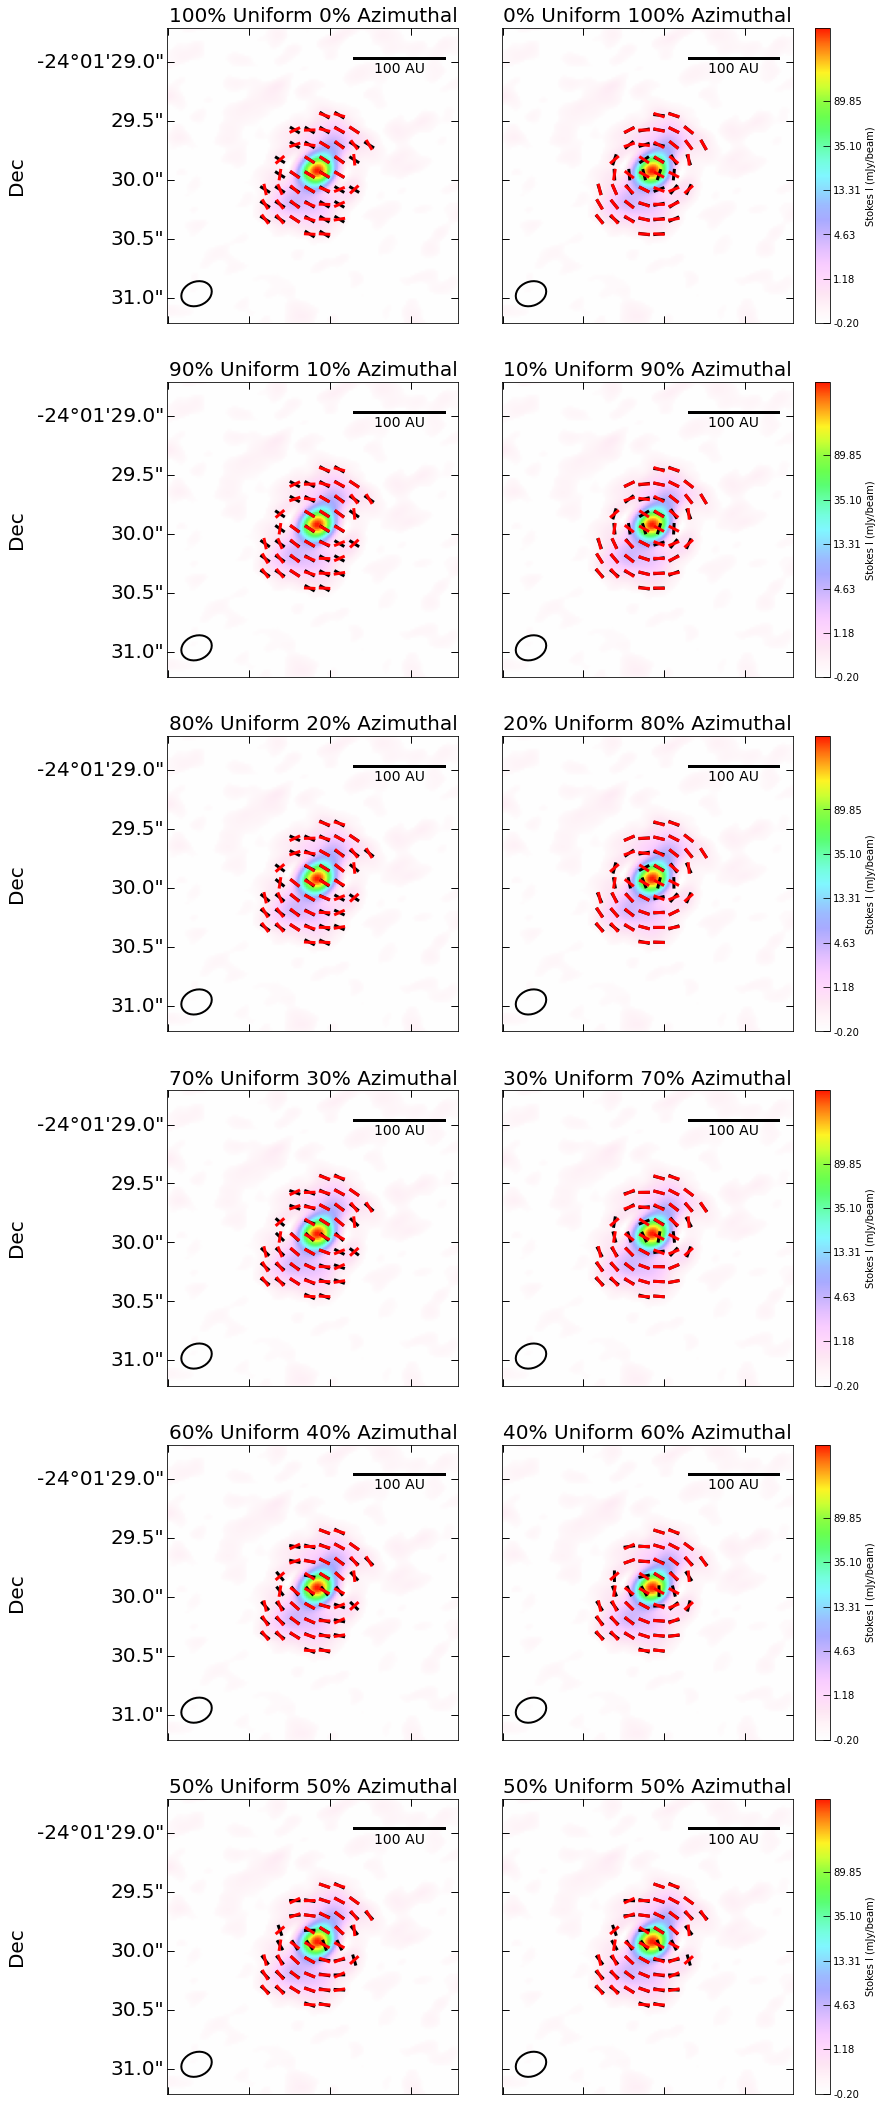

In [25]:
# Define the figure and subplots
nrows, ncols = 6, 2
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 38), constrained_layout=True, 
                         subplot_kw={'projection': StokesI_wcs},
                         gridspec_kw={'wspace': -1})


# Loop through subplots
for i, ax in enumerate(axes.flat):
    if i >= len(ratio_grid_plot_titles):
        ax.axis("off")  # Hide empty subplots if there is extra space
        continue
    
    # Create blank grid
    row, col = divmod(i, ncols)
    create_blank_grid(row, col, 0.5, ax, PolarizedIntensity_data_2d_mJy, 
                      StokesI_wcs, StokesI_stretched, soft_colormap_v2, 
                      normalized_cbar_ticks, StokesI_unstretched_cbar_ticks, 
                      xmin, xmax, ymin, ymax, reference_length_pix, reference_length_AU,
                      text_fs, axis_label_fs, axis_num_fs, cbar_fs,
                      BMAJ_pix, BMIN_pix, BPA_deg_cartesian, 
                      max_length_pix, reference_fraction)
    
    ax.set_title(ratio_grid_plot_titles[i], fontsize=20)
    
    # Add vector plots
    for row in vector_data_list[i]:
        ax.plot([row[0], row[1]], [row[2], row[3]], color='black', lw = 3, label = 'Model')
        
    # Plot vector data on the first subplot (axes[0, 0])
    for row in vector_data_actual_same_length_cartesian:
        ax.plot([row[0], row[1]], [row[2], row[3]], color='red', lw = 3, label = 'Real')
    
    # Set axis labels and ticks
    if col == 0:
        ax.set_ylabel('Dec', fontsize=axis_label_fs)
        ax.tick_params(axis="y", which="both", left=True, labelleft=True)
    else:
        ax.tick_params(axis="y", which="both", left=True, labelleft=False)

    if row == nrows - 1:
        ax.set_xlabel('RA', fontsize=axis_label_fs)
        ax.tick_params(axis="x", which="both", bottom=True, labelbottom=True)
    else:
        ax.tick_params(axis="x", which="both", bottom=True, labelbottom=False)
    
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.minorticks_on()
    ax.tick_params(axis="x", which="major", direction="in", bottom=True, top=True, length=7, labelsize=axis_num_fs - 10)
    ax.tick_params(axis="y", which="major", direction="in", left=True, right=True, length=7, labelsize=axis_num_fs)

plt.show()

## Find the best one

In [27]:
min_index = find_best_fit_ratio_model(vector_angle_actual_same_length_astronomy, testing_vector_angles)

the length of chi_squared_values is : 11
Chi-squared values for ratio models:
  100 U 0 A: χ² = 18.705
  90 U 10 A: χ² = 17.835
  80 U 20 A: χ² = 17.042
  70 U 30 A: χ² = 16.502
  60 U 40 A: χ² = 16.764
  50 U 50 A: χ² = 20.498
  40 U 60 A: χ² = 19.534
  30 U 70 A: χ² = 19.384
  20 U 80 A: χ² = 20.038
  10 U 90 A: χ² = 23.503
  0 U 100 A: χ² = 23.965

Best-fit ratio model: 70 U 30 A (χ² = 16.502)


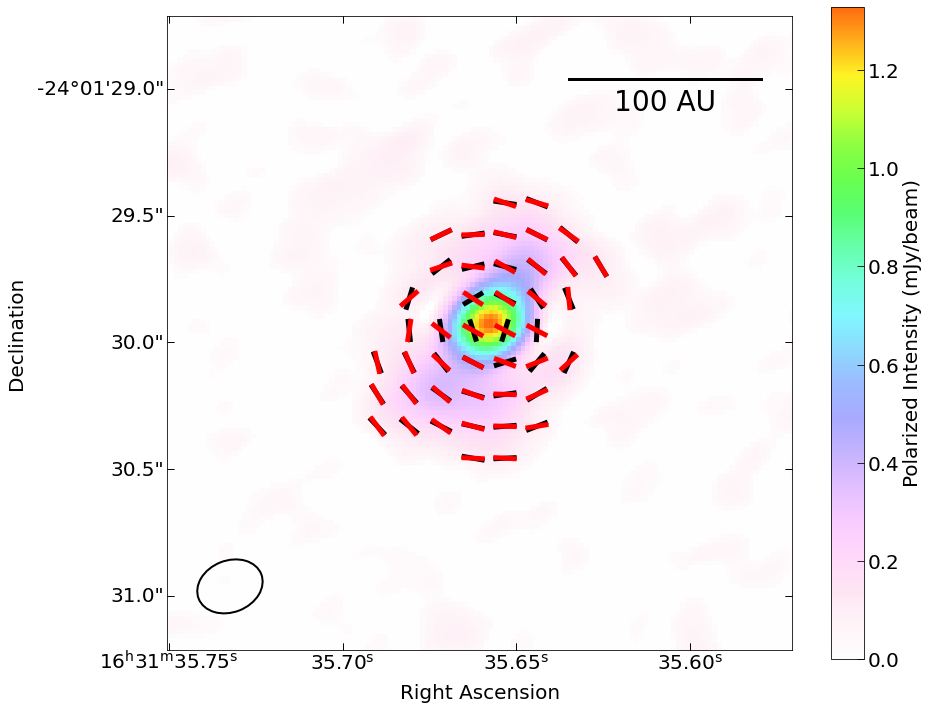

In [28]:
fig, ax = create_base_plot(StokesI_wcs, PolarizedIntensity_data_2d_mJy, 'Polarized Intensity (mJy/beam)' , 
                           soft_colormap_no_red, 
                           xmin, xmax, ymin, ymax, reference_length_pix, reference_length_AU,
                           BMAJ_pix, BMIN_pix, BPA_deg_cartesian, 
                           max_length_pix, reference_fraction)

# Add vector plots
for row in vector_data_list[min_index]:
    ax.plot([row[0], row[1]], [row[2], row[3]], color='black', lw = 5, label = 'Best Model')

# Plot vector data on the first subplot (axes[0, 0])
for row in vector_data_actual_same_length_cartesian:
    ax.plot([row[0], row[1]], [row[2], row[3]], color='red', lw = 5, label = 'Real')